In [1]:
import torch
import matplotlib.pyplot as plt

# Parameters
width = 256
max_baseline = 4.0
nant = 4
center_position=[128,128]
its=1000

ratio=[]

for p in range(its):

    # Initialize sky and antenna positions
    sky = torch.zeros((width, width), dtype=torch.complex64)
    sky[width // 2, width // 2] = 1

    ant_pos = []
    for i in range(nant):
        x = torch.rand(1).item() * max_baseline
        y = torch.rand(1).item() * max_baseline
        ant_pos.append([x, y])
    

    # Calculate baselines
    baselines = []
    for i in range(nant):
        for j in range(nant):
            if i != j:
                a1 = ant_pos[i]
                a2 = ant_pos[j]
                u = a1[0] - a2[0]
                v = a1[1] - a2[1]
                baselines.append([u, v])

    # Initialize UV plane
    uv = torch.zeros((width, width), dtype=torch.complex64)

    # Update UV plane
    for u, v in baselines:
        u_index = int((u + max_baseline) * width / (2 * max_baseline))
        v_index = int((v + max_baseline) * width / (2 * max_baseline))
        if 0 <= u_index < width and 0 <= v_index < width:
            uv[u_index, v_index] = 1

    # Compute the image from UV plane
    sky_image = torch.fft.ifftshift(torch.fft.ifft2(torch.fft.fftshift(uv)))
    image = torch.abs(sky_image)

    # Display the resulting imag

    radius = 1  # Radius of the circular mask

    # Create a circular mask
    mask = torch.zeros((width, width), dtype=torch.bool)
    cy, cx = center_position
    y, x = torch.meshgrid(torch.arange(width), torch.arange(width), indexing='ij')
    mask = (x - cx)**2 + (y - cy)**2 <= radius**2

    # Apply the mask to the UV plane
    masked_uv = image * mask
    outofmask=image-masked_uv
    # Compute the image from UV plane
    sky_image = torch.fft.ifftshift(torch.fft.ifft2(torch.fft.fftshift(uv)))
    image = torch.abs(sky_image)


    #find ration of insidde mask vs outside mask. Best when ratio out/in is low as this means better antenaa array.
    
    nt_ratio=(torch.abs(torch.sum(outofmask)))/(torch.abs(torch.sum(masked_uv)))
    ratio.append(nt_ratio)
    ratio


  
ratio


[tensor(5331.9512),
 tensor(4423.1831),
 tensor(4585.5508),
 tensor(3322.8352),
 tensor(6642.6699),
 tensor(4281.6509),
 tensor(6103.6694),
 tensor(3624.8721),
 tensor(6021.9336),
 tensor(11023.8271),
 tensor(8703.0801),
 tensor(7023.3115),
 tensor(7693.0483),
 tensor(7056.5898),
 tensor(5034.9136),
 tensor(6071.2798),
 tensor(4777.6387),
 tensor(5047.1719),
 tensor(5711.3691),
 tensor(5697.1685),
 tensor(3959.2920),
 tensor(4217.3125),
 tensor(6376.9722),
 tensor(4278.9619),
 tensor(6560.4414),
 tensor(4685.5815),
 tensor(4998.8022),
 tensor(8628.1553),
 tensor(4463.0767),
 tensor(8225.7715),
 tensor(9199.5547),
 tensor(5200.3320),
 tensor(5551.3525),
 tensor(8742.1699),
 tensor(6527.0732),
 tensor(5857.7910),
 tensor(4056.3892),
 tensor(5788.0190),
 tensor(6737.9712),
 tensor(4387.0352),
 tensor(3825.7490),
 tensor(4500.7905),
 tensor(5871.6333),
 tensor(10287.0811),
 tensor(4388.2563),
 tensor(5463.9326),
 tensor(11191.2090),
 tensor(4464.6353),
 tensor(5793.8740),
 tensor(6228.8779

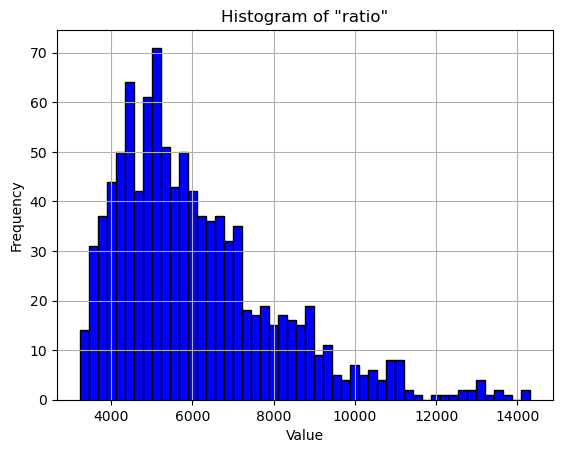

In [2]:
plt.hist(ratio, bins=50, color='blue', edgecolor='black')
plt.title('Histogram of "ratio"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

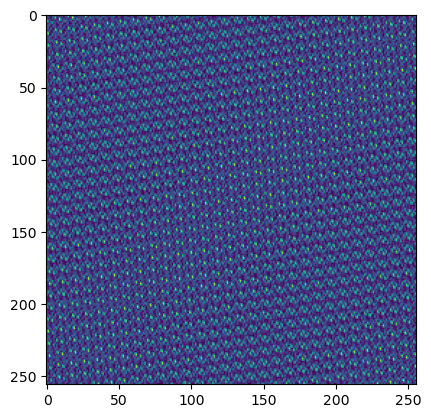

In [3]:

plt.imshow(image)
plt.show()